# Exploring Data Clustering

Approaches to explore:
- [Priciple Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis): [scikit-learn](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html)
- [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering): [scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan)



### Notes on [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan):
There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples, that can be built by recursively by taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Further, any cluster has at least min_samples points in it, following the definition of a core sample. For any sample that is not a core sample, and does have a distance higher than eps to any core sample, it is considered an outlier by the algorithm.

### Import and manipulate SAS data


In [12]:
import glob
import os.path as op
import numpy as np

In [2]:
sas_dir = 'sascalc'
saxs_dir = 'xray'
sans_dir = 'neutron_D2Op_100'
sas_ext = '*.iq'
saxs_search = op.join(sas_dir, saxs_dir, sas_ext)
sans_search = op.join(sas_dir, sans_dir, sas_ext)
print(saxs_search)
print(sans_search)

sascalc/xray/*.iq
sascalc/neutron_D2Op_100/*.iq


In [10]:
saxs_files = glob.glob(saxs_search)
sans_files = glob.glob(sans_search)
print(len(saxs_files))
print(len(sans_files))

200
200


In [37]:
saxs_data = []
first_data = np.loadtxt(saxs_files[0])
saxs_data.append(first_data[1:, 1])
for saxs_file in saxs_files[1:]:
    this_data = np.loadtxt(saxs_file)
    assert np.allclose(this_data[0, 1], first_data[0, 1]), 'ERROR: data not normalize'
    assert np.allclose(this_data[:, 0], first_data[:, 0]), 'ERROR: data not on same Q-grid'
    saxs_data.append(this_data[1:, 1])
saxs_data = np.array(saxs_data)

In [40]:
q_values = this_data[1:, 0]

In [41]:
q_values

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ])

In [42]:
nd, nq = saxs_data.shape # for PCA, should be (n_samples, n_features)

In [43]:
nq, nd

(40, 200)

In [44]:
saxs_data[:5, :5] 

array([[ 0.109218,  0.084704,  0.056446,  0.034189,  0.021314],
       [ 0.109229,  0.084742,  0.056516,  0.034278,  0.021403],
       [ 0.109209,  0.08468 ,  0.056426,  0.034189,  0.021332],
       [ 0.109217,  0.084712,  0.05648 ,  0.034219,  0.021273],
       [ 0.109084,  0.084166,  0.055315,  0.032548,  0.019586]])

In [47]:
min_vals = saxs_data.min(axis=0)
max_vals = saxs_data.max(axis=0)
saxs_range = max_vals - min_vals
print(saxs_range)

[  3.06600000e-03   9.43600000e-03   1.33460000e-02   1.14230000e-02
   7.35500000e-03   4.51100000e-03   3.98700000e-03   2.87300000e-03
   1.59900000e-03   1.02400000e-03   9.73000000e-04   9.71000000e-04
   8.56000000e-04   7.61000000e-04   6.38000000e-04   5.57000000e-04
   5.14000000e-04   5.20000000e-04   4.33000000e-04   2.53000000e-04
   1.81000000e-04   1.41000000e-04   1.21000000e-04   1.11000000e-04
   8.90000000e-05   8.00000000e-05   7.80000000e-05   6.20000000e-05
   5.50000000e-05   5.20000000e-05   5.20000000e-05   5.40000000e-05
   5.60000000e-05   5.60000000e-05   4.80000000e-05   4.30000000e-05
   3.70000000e-05   3.50000000e-05   3.40000000e-05   3.10000000e-05]


#### Rescale the data
Originally used `StandardScaler` but changed to `RobustScaler` to avoid complications from outliers (which skew the mean)

In [80]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()

In [81]:
scaler.fit(saxs_data)

RobustScaler(copy=True, with_centering=True, with_scaling=True)

In [82]:
scaled_data = scaler.transform(saxs_data)
print(scaled_data[:5, :5])

[[-0.49091402 -0.40799064 -0.32635368 -0.05543155  0.90684171]
 [-0.4789802  -0.39431297 -0.30578209 -0.02232143  0.95177985]
 [-0.50067806 -0.41662917 -0.33223128 -0.05543155  0.91593032]
 [-0.49199892 -0.40511113 -0.31636177 -0.04427083  0.88613986]
 [-0.63628967 -0.60163772 -0.65873191 -0.66592262  0.03433476]]


In [83]:
min_vals = scaled_data.min(axis=0)
max_vals = scaled_data.max(axis=0)
scaled_range = max_vals - min_vals
print(scaled_range)

[ 3.32628153  3.39638261  3.92212181  4.24962798  3.71370866  2.55943262
  2.84531668  3.72512156  3.16947473  5.27155727  6.76869565  5.46272855
  4.29611041  4.51632047  2.93333333  3.23367199  3.85018727  4.3153527
  3.90970655  3.5017301   3.23214286  2.87755102  3.27027027  4.0733945
  3.42307692  4.          4.10526316  3.875       4.23076923  4.
  4.33333333  4.15384615  4.57142857  4.66666667  3.42857143  3.58333333
  3.36363636  3.18181818  3.77777778  3.875     ]


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

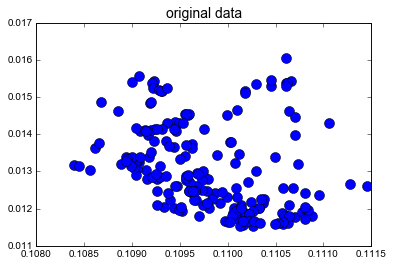

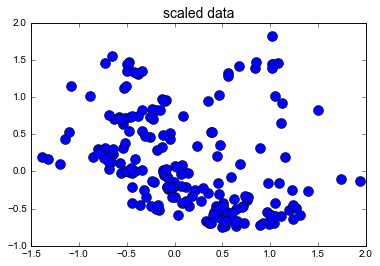

In [85]:
plt.figure()
plt.plot(saxs_data[:,0], saxs_data[:,5], 'bo')
plt.title('original data')
plt.figure()
plt.plot(scaled_data[:,0], scaled_data[:,5], 'bo')
plt.title('scaled data')

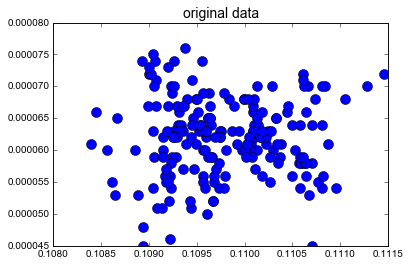

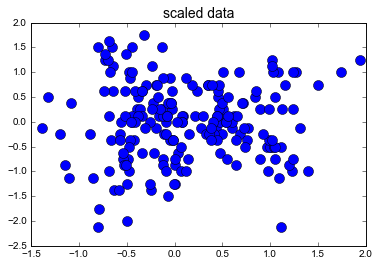

In [86]:
i_compare = 39
plt.figure()
plt.plot(saxs_data[:,0], saxs_data[:, i_compare], 'bo')
plt.title('original data')
plt.figure()
plt.plot(scaled_data[:,0], scaled_data[:, i_compare], 'bo')
plt.title('scaled data')

### PCA Analysis

In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

/opt/intel/intelpython35/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [87]:
pca_orig = PCA()
pca_orig.fit(saxs_data)

PCA(copy=True, n_components=None, whiten=False)

In [88]:
pca_scaled = PCA()
pca_scaled.fit(scaled_data)

PCA(copy=True, n_components=None, whiten=False)

In [89]:
print(pca_orig.explained_variance_ratio_)
print(pca_scaled.explained_variance_ratio_)

[  8.22118279e-01   1.63556003e-01   7.18024657e-03   3.14522346e-03
   1.73006833e-03   9.59764131e-04   9.16954481e-04   2.30150295e-04
   7.32214950e-05   4.07944391e-05   1.38683407e-05   1.19528038e-05
   8.00134790e-06   7.90540430e-06   4.49344720e-06   1.72459909e-06
   7.58251882e-07   4.27552153e-07   8.14318050e-08   8.55113149e-09
   5.77151351e-09   5.76428269e-09   5.39960282e-09   5.09315489e-09
   4.98508202e-09   4.52150524e-09   4.20053384e-09   4.15026353e-09
   3.98753893e-09   3.95730107e-09   3.61202819e-09   3.29702866e-09
   2.86072616e-09   2.65455410e-09   2.63559275e-09   2.29174069e-09
   2.15153327e-09   2.12643283e-09   1.82400091e-09   1.53500853e-09]
[  1.74798695e-01   1.60448012e-01   1.42743006e-01   9.48058329e-02
   8.91554185e-02   7.00428052e-02   6.08753528e-02   5.49583598e-02
   4.57464873e-02   3.30540883e-02   2.92641079e-02   1.82182173e-02
   9.25326614e-03   6.89166242e-03   4.84101794e-03   2.44373863e-03
   1.60435949e-03   5.17554289e-0

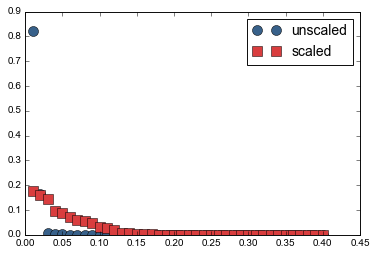

In [93]:
plt.figure()
plt.plot(q_values, pca_orig.explained_variance_ratio_, 'o', label='unscaled')
plt.plot(q_values, pca_scaled.explained_variance_ratio_, 's', label='scaled')
plt.legend()

In [31]:
pca

PCA(copy=True, n_components=None, whiten=False)

In [64]:
from sklearn.datasets.samples_generator import make_blobs

In [73]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [74]:
X_scaled = StandardScaler().fit_transform(X)

In [75]:
X_range = X.max(axis=0) - X.min(axis=0)
print(X_range)

[ 4.30150856  4.18343869]


In [76]:
X_scaled_range = X_scaled.max(axis=0) - X_scaled.min(axis=0)
print(X_scaled_range)

[ 4.14491229  4.06959487]


In [77]:
X_s2 = StandardScaler().fit_transform(X)

In [79]:
X_s2_range = X_s2.max(axis=0) - X_s2.min(axis=0)
print(X_s2_range)

[ 4.14491229  4.06959487]
